# Chapter 2: Initial Image Benchmarking

Dear user, we will be conducting benchmarking with 2 competitor products, \
where we query a LLM on the difference it can identify purely from the product vs competitor images.

### TO DO SECTION

In [1]:
'''
Dear user, enter your Product here!
'''

product = "Scoot B787"

In [2]:
'''
Dear user, please download pictures of components in your product and 2 competitors' products.
Save them in the others/{component_name} folder as product.jpg, comp_1.jpg and comp_2.jpg respectively.
'''

"\nDear user, please download pictures of components in your product and 2 competitors' products.\nSave them in the others/{component_name} folder as product.jpg, comp_1.jpg and comp_2.jpg respectively.\n"

### RUN AS INTENDED (DO NOT CHANGE ANYTHING.)

##### Set Up

In [3]:
! pip install openai==1.13.3

In [4]:
""" Set up OpenAI API key """
import os
from dotenv import load_dotenv

load_dotenv()

key = os.getenv("OPENAI_API_KEY")

## Image Query into LLM to identify Differences

In [5]:
import base64
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps
from openai import OpenAI

def display_images(product_image_path, comp_image_paths):
    # Open and resize product image
    product_image = Image.open(product_image_path)
    product_image = ImageOps.fit(product_image, (200, 150), Image.BICUBIC)

    fig, axes = plt.subplots(1, len(comp_image_paths) + 1, figsize=(15, 5))
    
    # Display product image
    axes[0].imshow(product_image)
    axes[0].set_title('B787')
    axes[0].axis('off')
    
    # Display competitor images
    for i, comp_image_path in enumerate(comp_image_paths):
        # Open and resize competitor image
        comp_image = Image.open(comp_image_path)
        comp_image = ImageOps.fit(comp_image, (200, 150), Image.BICUBIC)
        
        axes[i + 1].imshow(comp_image)
        axes[i + 1].set_title(f'Competitor {i+1}')
        axes[i + 1].axis('off')
        
    plt.show()

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def compare_image_query(component, prompt):
    product_image_path = f'others/{component}/product.jpg'
    comp_image_paths = [f'others/{component}/comp_1.jpg', f'others/{component}/comp_2.jpg']

    product_base64 = encode_image(product_image_path)
    comp_base64_images = [encode_image(path) for path in comp_image_paths]

    messages = [{
        "role": "user",
        "content": [{"type": "text", "text": prompt}]
    }]

    messages.append({
        "role": "user",
        "content": [{"type": "image_url", "image_url": f"data:image/jpeg;base64,{product_base64}"}]
    })

    for base64_image in comp_base64_images:
        messages.append({
            "role": "user",
            "content": [{"type": "image_url", "image_url": f"data:image/jpeg;base64,{base64_image}"}]
        })

    client = OpenAI()

    response = client.chat.completions.create(
        model="gpt-4-vision-preview",
        messages=messages,
        max_tokens=300  # max length of response
    )

    display_images(product_image_path, comp_image_paths)
    print(response.choices[0].message.content)

C:\Users\Asus\AppData\Local\Temp\ipykernel_19496\783954422.py:10: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  product_image = ImageOps.fit(product_image, (200, 150), Image.BICUBIC)
C:\Users\Asus\AppData\Local\Temp\ipykernel_19496\783954422.py:23: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  comp_image = ImageOps.fit(comp_image, (200, 150), Image.BICUBIC)


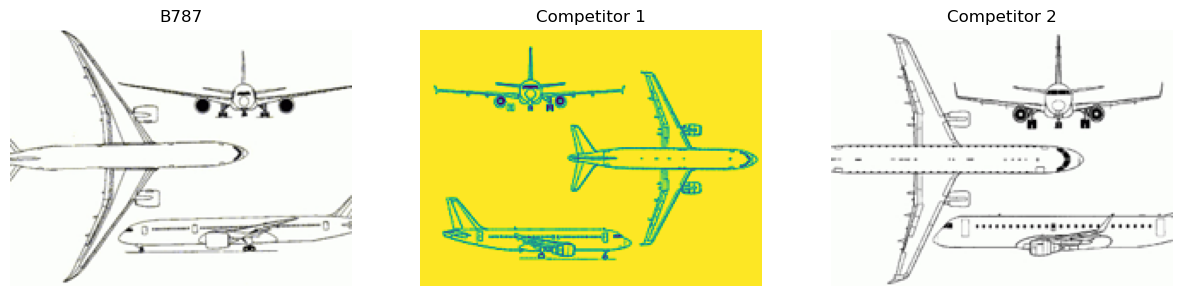

For the first image (B787):

1. Overall Aircraft Configuration: The B787 has a twin-engine configuration with engines under the wings, a swept-back wing design, and a prominent, raised tail section.
2. Wing Geometry: The wings of the B787 are swept back with raked wingtips.
3. Speed: Unable to identify.

For the second image (Competitor Aircraft):

1. Overall Aircraft Configuration: Similar twin-engine configuration under the wings, but the vertical stabilizer appears less raised.
2. Wing Geometry: The wings are swept back without the pronounced raked wingtips seen on the B787.
3. Speed: Unable to identify.

For the third image (Competitor Aircraft):

1. Overall Aircraft Configuration: This aircraft also has a twin-engine configuration with the engines under the wings. The vertical stabilizer is slightly less raised than the B787.
2. Wing Geometry: The wings are swept back with winglets at the tips as opposed to the raked wingtips of the B787.
3. Speed: Unable to identify.


In [17]:
component = "aircraft"
prompt = f"You are given 3 different images of a {component}.\n \
        For each {component}, compare and identify the differences in: \n \
        1. Overall Aircraft Configuration \n \
        2. Wing Geometry \n \
        3. Speed \n \
        Mention that the first image is from a B787. The other images are from other competitor aircrafts. \n \
        Do not output anything else. Keep the answer as concise as possible. If the result is inconclusive for that component, return Unable to identify"

compare_image_query(component, prompt)

C:\Users\Asus\AppData\Local\Temp\ipykernel_19496\783954422.py:10: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  product_image = ImageOps.fit(product_image, (200, 150), Image.BICUBIC)
C:\Users\Asus\AppData\Local\Temp\ipykernel_19496\783954422.py:23: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  comp_image = ImageOps.fit(comp_image, (200, 150), Image.BICUBIC)


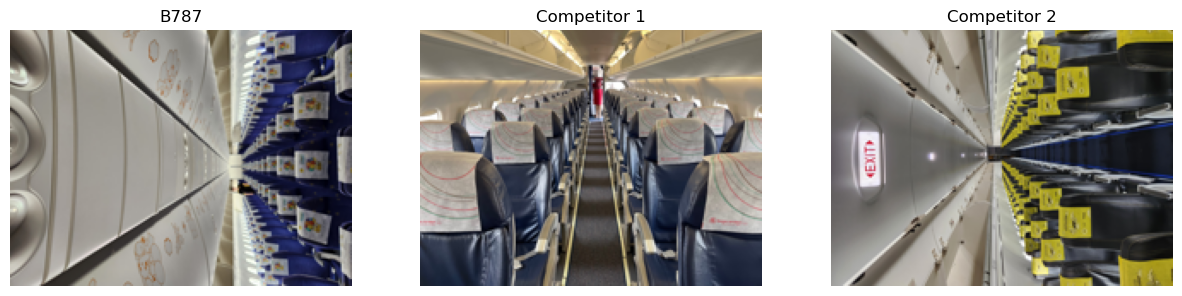

First image (B787):
1. Passenger Comfort: High ceiling, large windows, character-themed seat covers offering a playful vibe.
2. Layout: Traditional economy class arrangement, twin aisles with 3-3-3 seat configuration.
3. Accessibility: Wide aisles, overhead bins appear spacious, enhancing accessibility.

Second image:
1. Passenger Comfort: Leather seats with adjustable headrests; appears to be a more traditional, less playful atmosphere.
2. Layout: Single aisle with a 3-3 seat configuration, indicative of a narrow-body aircraft.
3. Accessibility: Narrower aisle than the B787, overhead bin size is standard, might be slightly more challenging to access.

Third image:
1. Passenger Comfort: Leather seats, bright yellow seat-back literature adds a lively touch to the cabin.
2. Layout: Single aisle with a 3-3 seat configuration, similar to the second image's narrow-body design but seemingly newer or better maintained.
3. Accessibility: Aisle width is comparable to the second image, overhead 

In [10]:
component = "plane_interior"
prompt = f"You are given 3 different images of a {component}.\n \
        For each {component}, compare and identify the differences in: \n \
        1. Passenger Comfort \n \
        2. Layout \n \
        3. Accessibility \n \
        Mention that the first image is from a B787. The other images are from other competitor aircrafts. \n \
        Do not output anything else. Keep the answer as concise as possible."

compare_image_query(component, prompt)

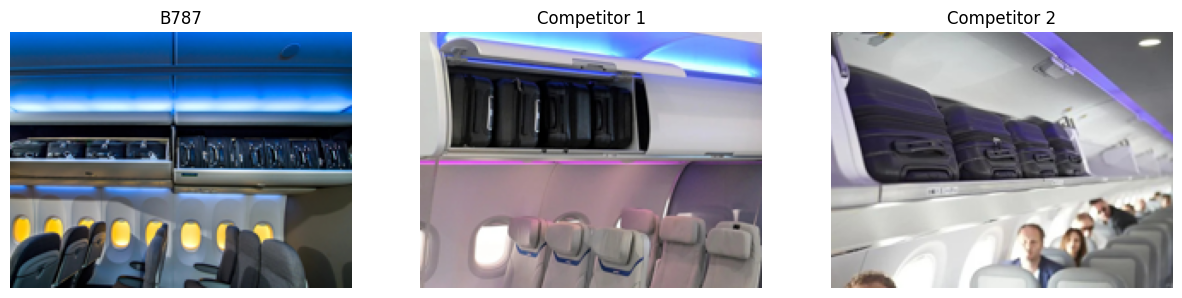

Image 1 (from B787):
1. Mechanism: Features a pivot bin design that swings down for loading luggage.
2. Baggage Storage Space: Accommodates bags placed on their sides, maximizing volume and allowing for stowage of larger items.
3. Passenger Safety: Wide opening with a controlled, smooth mechanism minimizes the risk of falling items during opening and closure.

Image 2:
1. Mechanism: It appears to have a drop-down hinge mechanism similar to the B787 but with a different bin design.
2. Baggage Storage Space: Similar storage capacity to the B787, but the curvature of the bin may slightly limit the ability to store larger bags.
3. Passenger Safety: Features a wide opening and smooth edges, which should enhance safety during operation, similar to the B787's design.

Image 3:
1. Mechanism: The bins open upwards and appear to have a straightforward hinge mechanism without a pivot function.
2. Baggage Storage Space: Offers more depth in the bin, which may accommodate more or differently shaped

In [ ]:
component = "overhead_bin"
prompt = f"You are given 3 different images of a {component}.\n \
        For each {component}, compare and identify the differences in: \n \
        1. Mechanism \n \
        2. Baggage Storage Space \n \
        3. Passenger Safety \n \
        Mention that the first image is from a B787. The other images are from other competitor aircrafts. \n \
        Do not output anything else. Keep the answer as concise as possible."

compare_image_query(component, prompt)

C:\Users\Asus\AppData\Local\Temp\ipykernel_19496\783954422.py:10: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  product_image = ImageOps.fit(product_image, (200, 150), Image.BICUBIC)
C:\Users\Asus\AppData\Local\Temp\ipykernel_19496\783954422.py:23: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  comp_image = ImageOps.fit(comp_image, (200, 150), Image.BICUBIC)


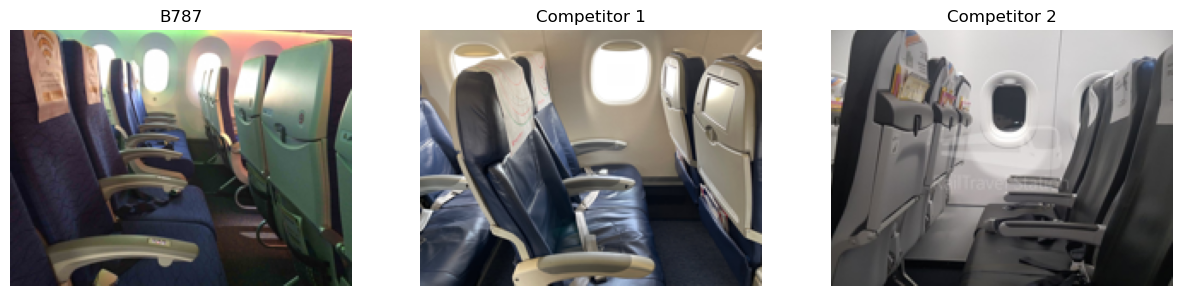

First Image (B787):
1. Leg Space: Appears to be generous with ample space between rows.
2. Seat Comfort: Upholstered in a woven fabric which may provide breathability; ergonomic armrests and a slight recline indicate a focus on comfort.
3. Overall Design: Modern and pleasant with a soothing color palette, integrated headrests, slimline design which may contribute to increased personal space.

Second Image:
1. Leg Space: Comparable to the first image but slightly less generous.
2. Seat Comfort: Leather upholstery which might be less breathable than fabric; similar armrests and seat design suggesting moderate comfort.
3. Overall Design: Utilitarian with a basic color scheme; less design flair but functional, with a focus on cleanliness and practicality.

Third Image:
1. Leg Space: Limited compared to the first two images, suggesting a more compact seating arrangement.
2. Seat Comfort: Slim seats potentially less padded, which could impact comfort over longer flights.
3. Overall Design: V

In [11]:
component = "seats"
prompt = f"You are given 3 different images of a {component}.\n \
        For each {component}, compare and identify the differences in: \n \
        1. Leg Space \n \
        2. Seat Comfort \n \
        3. Overall design \n \
        Mention that the first image is from a B787. The other images are from other competitor aircrafts. \n \
        Do not output anything else. Keep the answer as concise as possible."

compare_image_query(component, prompt)